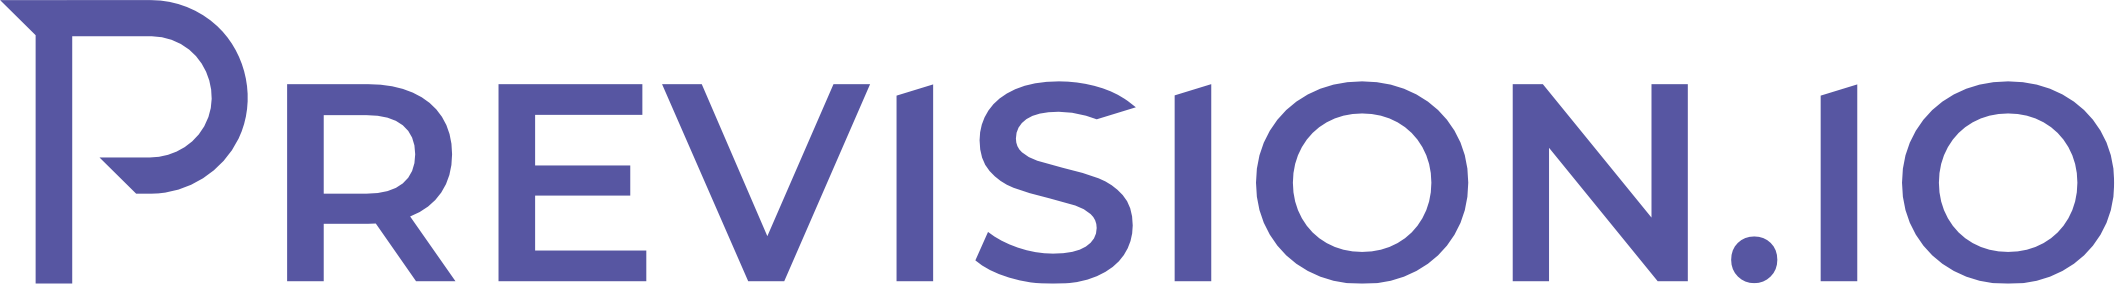

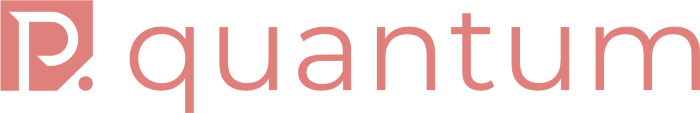

# Prevision-quantum-nn for multiclassification

This notebook aims at showing the possibility of using quantum algorithms in order to perform multi-class classification.

First the useful libraries are imported:

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import prevision_quantum_nn as qnn

Then the dataset is defined. For this notebook, the dataset "iris" is imported from scikit learn. Other datasets can be used, but check their format!

In [29]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
X = df.to_numpy()
y = iris.target
    
train_features, val_features, train_labels, val_labels = train_test_split(X, y, test_size=0.33, random_state=42)

The dataset is built:

In [ ]:
dataset = qnn.get_dataset_from_numpy(train_features,
                                     train_labels,
                                     val_features=val_features,
                                     val_labels=val_labels)

The preprocessing parameters are defined. These parameters will be used in order to prepare the data before building the application.

List of preprocessing parameters for the classification application:
- force_dimension_reduction: allows dimension reduction if too many. Type: boolean
- polynomial_degree: degree of the polynomial expansion (1: no expansion). Type: integer
- padding: value of the padded data if required. Type: float

In [ ]:
preprocessing_params = {
    "force_dimension_reduction": True,
    "polynomial_degree": 1
}

The model parameters are defined. These parameters configure the application itself. Please refer to the documentation for more details.

List of model parameters for the classification application:
- architecture: type or architecture (qubit or cv, for continuous variables). Type: string
- num_q: number of qubits/qumodes used. Type: integer
- encoding: data encoding method. Type: string
- use_early_stopper: allows the use of an early stop during the fit. Type: boolean
- early_stopper_patience: patience of the early stopper. Type: integer
- max_iterations: maximum number of epoch during the fit. Type: integer
- interface: interface option for Pennylane (autograd or tf). Type: string
- layer_type: type of circuit (template or custom). Type: boolean
- snapshot_frequency: snapshot_frequency: frequency in number of iterations at which the model needs to snapshot. Type: int
- verbose: allows verbosity during the fit. Type: boolean
- prefix: base name of the saved output files and plots. Type: string
- num_layers: depth of the quantum circuit. Type: integer
- optimizer_name: defines the optimizer used for the fit. Type: string
- learning_rate: learning rate of the optimizer. Type: float

In [ ]:
model_params = {
    "architecture": "qubit",
    "num_q": 4,
    "encoding": "angle",
    "use_early_stopper": True,
    "early_stopper_patience": 20,
    "max_iterations": 2000,
    "interface": "autograd",
    "layer_type": "template",
    "snapshot_frequency": 5,
    "verbose": True,
    "prefix": "iris",
    "num_layers": 4,
    "optimizer_name": "Adam",
    "learning_rate": 0.05,
}

Since all the parameters were defined, the application can be built.

In [ ]:
application = qnn.get_application("multiclassification",
                                  prefix="iris",
                                  preprocessing_params=preprocessing_params,
                                  model_params=model_params)

The application can now be solved. Progression is shown below.

In [ ]:
application.solve(dataset)

The evolution the of the train loss, validation loss and accuracy (called "metric" on the plot) during the fit can be visualized by refreshing the cell below (note: the file name is the "prefix" parameter used in the application following by the ".listing" extension).

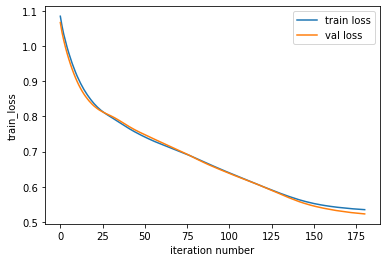

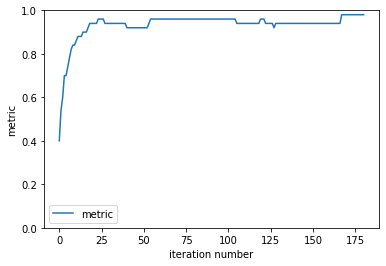

In [2]:
parsing = qnn.parse_results("iris.listing")
qnn.plot_losses(parsing)
qnn.plot_metric(parsing)